# Week of Oct 21
# 1.

## Explain the theoretical Simple Linear Regression model
## - describe its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) 
## - and describe how they combine to form a sample from normal distribution; 
## - then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

The theoretical simple linear regression model is a method used to describe the relationship between 2 variables: X, and Y. It is modelled by the equation: Yi=B naught +B1Xi +Ei. Yi is the observed outcome variable for the i-th data point, Xi is the observed value for the i-th data point, B naught is the intercept of the regression line (expected value of Y, when X=0), B1 is the slope of the line, and Ei is the error term for the i-th observation (to account for the variation in Y, and represents random noise/outliers). The model's components are meant to combine to describe how Y is distributed given X. Given the formula for linear regression, Y is modelled as a combination of B naught +B1Xi and random error Ei. Ei is normally distributed with mean zero and constant variance, thus Yi follows a normal distribution as well with the mean B naught +B1Xi, and the same variance as Ei. 

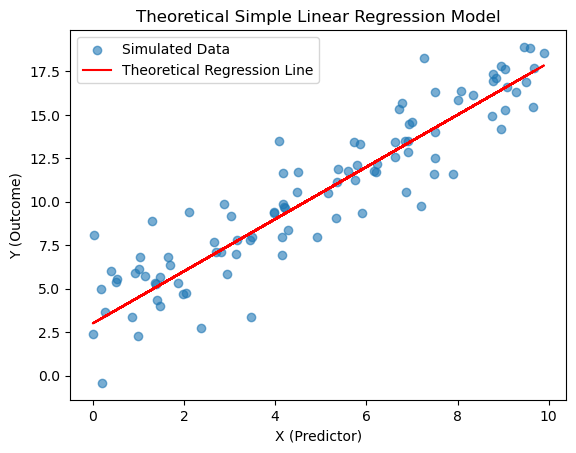

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Set parameters
n = 100  # Number of data points
beta_0 = 3  # Intercept
beta_1 = 1.5  # Slope
sigma = 2  # Standard deviation of error term

# Generate predictor variable X (uniformly distributed between 0 and 10)
np.random.seed(1)  # For reproducibility
X = uniform.rvs(0, 10, size=n)

# Generate error terms E (normally distributed with mean 0 and standard deviation sigma)
E = norm.rvs(0, sigma, size=n)

# Calculate outcome variable Y using the theoretical model
Y = beta_0 + beta_1 * X + E

# Plot the results
plt.scatter(X, Y, label="Simulated Data", alpha=0.6)
plt.plot(X, beta_0 + beta_1 * X, color="red", label="Theoretical Regression Line")
plt.xlabel("X (Predictor)")
plt.ylabel("Y (Outcome)")
plt.title("Theoretical Simple Linear Regression Model")
plt.legend()
plt.show()

# 2. 

## Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform

# Simulate the data
n = 100  # Number of data points
beta_0 = 3  # Y -intercept
beta_1 = 1.5  # Slope
sigma = 2  # Std of error term Ei

np.random.seed(1)  # For reproducibility
x = uniform.rvs(0, 10, size=n)  # Predictor variable
errors = norm.rvs(0, sigma, size=n)  # Error terms
Y = beta_0 + beta_1 * x + errors  # Outcome variable

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

In [12]:
import statsmodels.formula.api as smf  

# What is this library for?
# statsmodels is a library used for estimating and interpreting various statistical models, including regression models.

import plotly.express as px  # This is a plotting library

# Specifies the linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)  
# What does this step do?
# This step specifies an Ordinary Least Squares (OLS) regression model using the formula "Y ~ x" on the DataFrame 'df'.

# Fits the model to estimate the parameters
fitted_model = model_data_specification.fit()  
# What does this step do?
# This step fits the OLS regression model to the data, and estimates the coefficients (slope and intercept).


In [16]:
# Model outputs
#What do the following steps provide?

fitted_model.summary()  
# This step provides a detailed summary of the fitted regression model, including statistics such as R-squared, p-values, and coefficient estimates.

fitted_model.summary().tables[1]  
# This step displays a table with the estimated coefficients, standard errors, t-statistics, and p-values for the regression model.

fitted_model.params  
# This step returns the estimated values of the intercept and slope.

fitted_model.params.values  
# This step returns the estimated values of the intercept and slope as a NumPy array.

fitted_model.rsquared  
# This step returns the R-squared value, which indicates how well the model explains the variability in the data.

0.8483592885692939

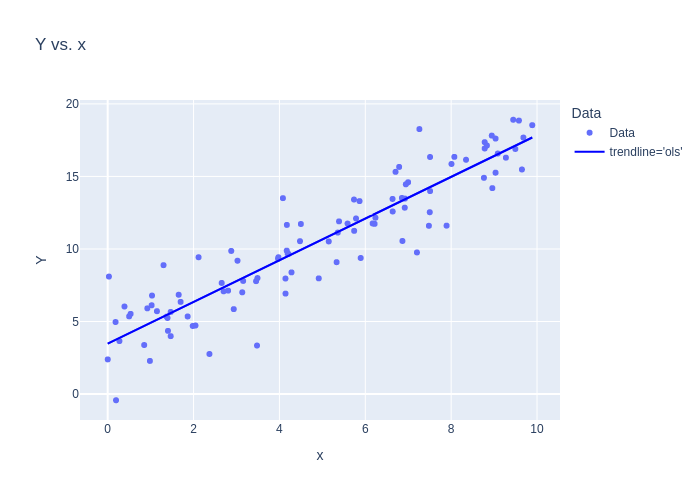

In [18]:
import plotly.express as px

# Adds a column to the DataFrame for legend purposes
df['Data'] = 'Data'  # Hack to add data to the legend

# Create a scatter plot with a trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Explanation: The `trendline='ols'` option adds a fitted regression line (Ordinary Least Squares) to the scatter plot.

# Manually add the trendline using `add_scatter`
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")
# Explanation: Adds the fitted regression line to the figure, overlaying it on the scatter plot.

fig.show(renderer="png")


# 3.

## Add the line from Question 1 on the figure of Question 2 
## - and explain the difference between the nature of the two lines
### -hint: simulation of random sampling variation

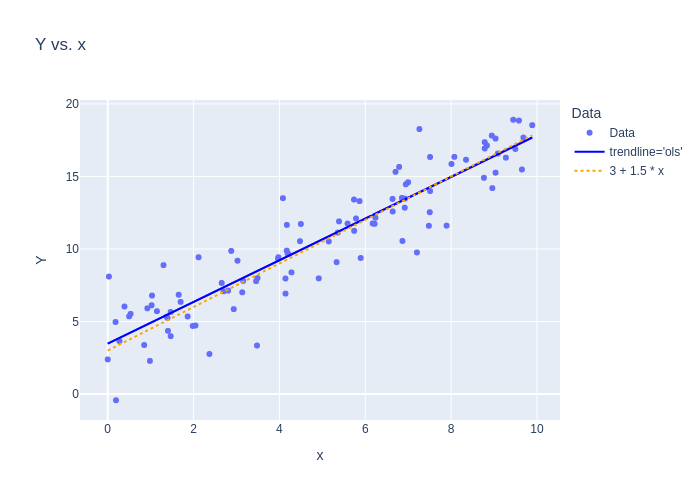

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform
import statsmodels.formula.api as smf
import plotly.express as px

# Simulate the data
n = 100  # Number of data points
beta0 = 3  # Intercept
beta1 = 1.5  # Slope
sigma = 2  # Standard deviation of error term

np.random.seed(1)  # For reproducibility
x = uniform.rvs(0, 10, size=n)  # Predictor variable
errors = norm.rvs(0, sigma, size=n)  # Error terms
Y = beta0 + beta1 * x + errors  # Outcome variable

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit the linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Create a scatter plot with the fitted regression line
df['Data'] = 'Data'  # Hack to add data to the legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted regression line (trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Add the theoretical regression line
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer='png')

The main difference between the 2 lines is that in Q1, it is a theoretical simple regression line, whereas in Q2, it is a fitted regression line. In a theoretical line, the coefficients are specified with specific parameters (ex: B naught=3, B1=1.5) and it does not change among different samples/simulations. However, a fitted regression line uses coefficients that are estimated based on the data using OLS. Therefore, the line will vary sample to sample. The theoretical regression line represents the ideal/true relationship between x and y, while the fitted line simply extimates the relationship between x and y, being derived from the simulated/observed data. By plotting both lines, it can more clearly show the impact of random errors as well as sampling variability.

# 4.

## Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

First, fitted_model.params provides estimated coefficients and is calculated using OLS, similar to fitted_model.summary().tables[1] which also provides the estimated coefficients along with other data, but presented in the form of a table. The coefficients in the table or from fitted_model.params are used to derive fitted_model.fittedvalues. Using the coefficients, one can create an equation for fitted_model.fittedvalues where you can plug in each x value from the sample to produce a series of predicted Y values for each Xi in the df['x']. 

# 5. 

## Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"


## which line is chosen for the fitted model, why? 

The line that is chosen for the fitted model is the one that minimizes the total distance between the observed data points and the line (measured vertically). OLS minimizes the sum of the squared differences between the observed Y values and the predicted Y values from the line. By squaring the differences, it ensures that all the differnces are positive, and prevents negative errors from cancelling positive ones. Additionally, it can give more weight to larger errors, making it more sensitive to larger deviations so that the line fits the data as best as possible through all the data points. 

# Chat summary 
#### https://chatgpt.com/share/672c4bb0-a984-8003-b9f3-6aca8a9ede8c
Here's a summary of our conversation:

Simple Linear Regression (Theoretical vs. Fitted):

We discussed the theoretical Simple Linear Regression model, where coefficients are specified and fixed.

We then explored the fitted model, where coefficients are estimated from data using the Ordinary Least Squares (OLS) method.

Code for Visualization and Comparison:

You combined theoretical and fitted regression lines into a single plot, demonstrating the impact of sampling variability on the fitted line.

Key Outputs from statsmodels:

We covered the meanings of outputs from fitted_model.params, fitted_model.summary().tables[1], and fitted_model.fittedvalues.

Explanation of OLS Method:

OLS finds the line that minimizes the squared differences between observed and predicted values. Squaring ensures positive values, prevents cancellation, and adds weight to larger errors.

Your answers accurately captured these concepts, and the explanations were refined for clarity and completeness.

# 6. 

#### Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; 
#### - and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; 
#### - and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

## Why can we say that the first expression below shows the percentage of variation in Y that our model explains? 
## Why can we use the second expression (R-squared) as a way to judge how accurate our model is? 
## Also, what do the last two expressions (involving np.corrcoef) tell us about our model in simple linear regression?

The first expression, 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum(), measures how much of the variation in Y the model doesn’t explain. It is similar to one used to calculate R-squared. It shows the unexplained proportion of variation in Y (based on the squared residuals of the model). If you were to take 1-(the expression), it would give you R-squared. Therefore, it represents how well the model’s predictions match the actual data, telling us how much of Y’s variability the model accounts for.

The second expression, fitted_model.rsquared, gives us R-squared, which measures the proportion of total variation in Y that the model explains. A higher R-squared means a more accurate model for predicting Y based on the predictor variable(s). In simple terms, it’s a measure of the model’s accuracy.

The third and fourth expressions np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2 and np.corrcoef(Y,x)[0,1]**2  calculate the squared correlation between the observed values of Y and the predicted values (fitted_model.fittedvalues), and the squared correlation between the observed values of Y and the predictor variable x, respectively. Both correlation squared expressions reflect the strength of the linear relationship. Thus, the closer this value is to 1, the stronger the linear relationship between Y and X or Y and the predictions, supporting the model's explanatory power.

# 7. 

## Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

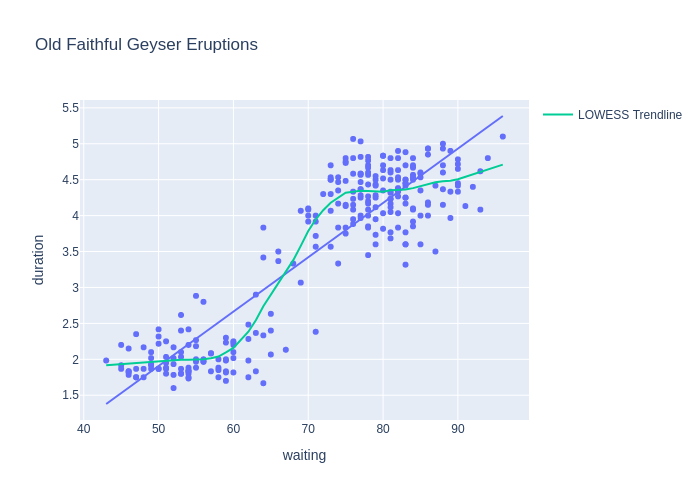

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png')

One of the assumptions of the Simple Linear Regression model specification is that the points follow a straight line. If the points do not appear to follow a roughly straight line but rather a curve, like an exponential or quadratic trend, this would violate the linearity assumption. From the data trend, the crop yield seems to increase at an accelerating rate as the amount of fertilizer increases, which contrary to the linearity assumption, suggests a nonlinear relationship. Furthermore, homoscedasticity is another assumption of the Simple Linear Regression model specification, which is where the variance of the residuals should be constant across all levels of x. The scatter plot of residuals versus x (not provided here but useful) can help indicate homoscedasticity. If the spread of residuals changes with different levels of fertilizer use (e.g., residuals increase as fertilizer amount increases), this would indicate heteroscedasticity, violating the homoscedasticity assumption. The histogram of residuals can also reveal if the residuals are normally distributed. Another assumption of the Simple Linear Regression model specification is that the residuals should be normally distributed. If the residuals show a skewed or non-normal pattern in the histogram, this would violate the normality of errors assumption. Moreover, another assumption is the independence of errors where the residuals (errors) should be independent of each other. It is very important that these assumptions are not violated. Violations of these assumptions could lead to biased estimates, invalid inference, or a reduced predictive power of the model.

# Chat log 

#### https://chatgpt.com/share/672d1842-f188-8003-ac28-141f677251f5

Simple Linear Regression Assumptions:

We reviewed the assumptions necessary for Simple Linear Regression (SLR) to be valid:

Linearity: The predictor x and outcome Y should have a linear relationship.

Independence of Errors: Residuals should be independent, meaning they don’t correlate with each other.

Homoscedasticity: The residuals should have constant variance across all levels of x.

Normality of Errors: Residuals should follow a normal distribution.

Data Analysis for Violations:

We discussed using plots to identify assumption violations:

A scatter plot of x vs. Y helps assess linearity. Curved patterns suggest nonlinearity, while constant scatter supports the linearity assumption.

Residual plots help detect heteroscedasticity, where the residual spread changes at different levels of x.

A histogram of residuals helps assess the normality of residuals.

Interpreting Data Trends and Patterns:

The provided dataset seemed to suggest a nonlinear relationship (accelerating crop yield with more fertilizer), likely violating linearity. Potential heteroscedasticity was also suggested, as residuals may vary across fertilizer levels, and a skewed histogram could indicate a non-normal distribution of errors.

These points provided the context for analyzing the assumptions in the dataset and explaining potential issues in using SLR without adjusting for these assumption violations.

# Week of Nov 4

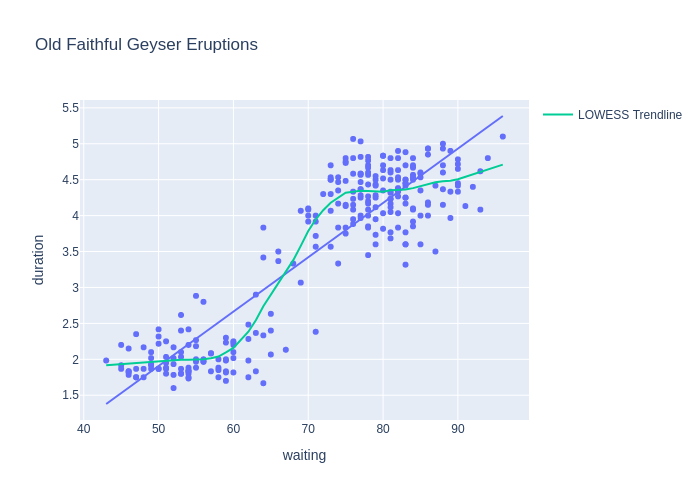

In [3]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png')

# 8.

## Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, 
## and use the code below to characterize the evidence in the data relative to the null hypothesis 
## and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset. 

In the context of Simple Linear Regression, the null hypothesis of "no linear association" between the two variables (duration and waiting) is represented by the slope parameter, B1. Thus, the null hypothesis H naught is: H naught: B1 =0. This hypothesis states that there is no linear association between the waiting time before eruptions and the duration of the eruptions in the Old Faithful Geyser dataset.

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        20:00:12   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value is very small (0), there is very strong evidence against the null hypothesis. Therefore, we reject the null hypothesis, concluding that there is evidence against H naught and suggesting a statistically significant linear association between waiting time and eruption duration. The likelihood of observing such a strong association under the null hypothesis (if B1=0) is virtually nonexistent.

# 9. 
## As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. 

## Within the context of only short wait times, 

## is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? 

## Using the code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


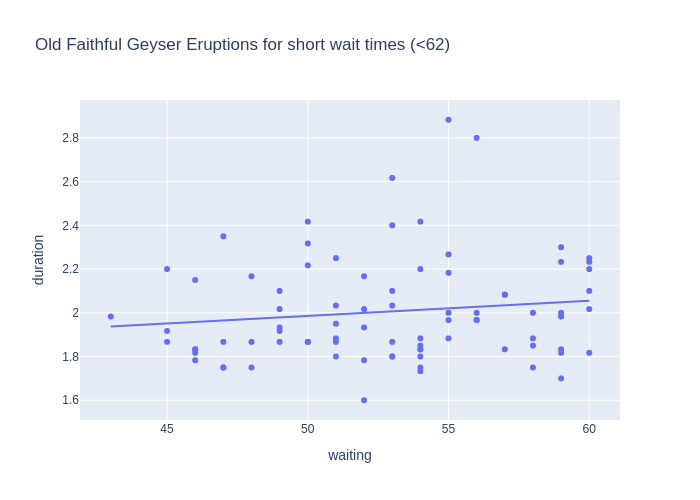

In [4]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


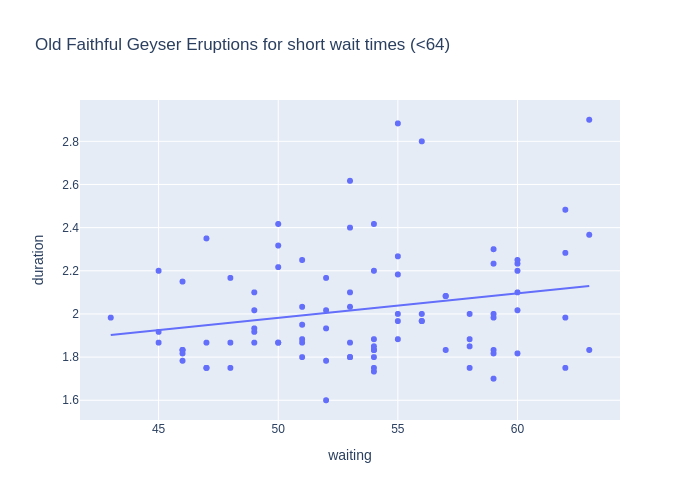

In [5]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the short wait limit and filter the dataset
short_wait_limit = 64 # and 66 in subsequent runs
short_wait = old_faithful.waiting < short_wait_limit

# Fit the regression model
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Plot the data with a regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')
fig.show(renderer='png')


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


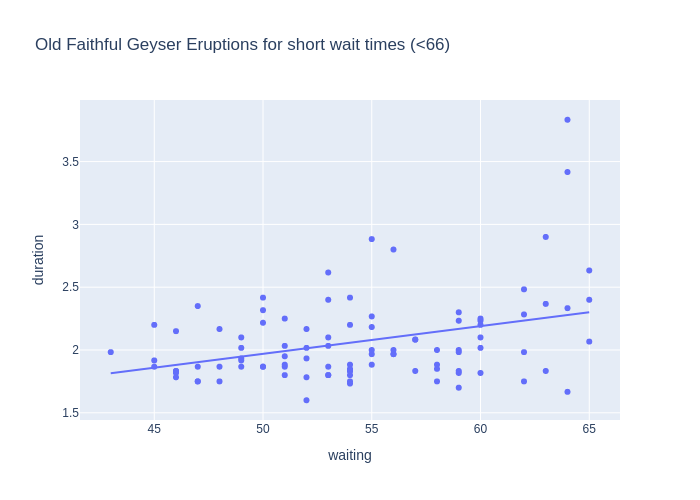

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the short wait limit and filter the dataset
short_wait_limit = 66 
short_wait = old_faithful.waiting < short_wait_limit

# Fit the regression model
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Plot the data with a regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')
fig.show(renderer='png')

The evidence suggests that the relationship between duration and wait time in the restricted dataset of short wait times (under 62, 64, and 66 minutes) is not as consistent or strong as in the full dataset. In the full dataset, a strong association is observed. For a short wait time of 62, the p-value (0.238) is above typical significance levels (like 0.05), there is insufficient evidence to suggest a significant relationship between waiting time and eruption duration. We fail to reject the null hypothesis, suggesting no statistically significant linear association between waiting time and eruption duration for wait times less than 62 minutes. For a short wait time of 64, this p-value (0.036) is below 0.05, indicating moderate evidence for a linear relationship between waiting time and eruption duration within this subset of the data. With this p-value, we reject the null hypothesis, indicating a statistically significant linear association between waiting time and eruption duration for wait times less than 64 minutes. For a short wait time of 66, the p-value was 0 (or effectively 0), suggesting very strong evidence against the null hypothesis, indicating a significant relationship between waiting time and eruption duration even for wait times less than 66 minutes. With a p-value of 0, we reject the null hypothesis, indicating strong evidence for a statistically significant linear association for wait times less than 66 minutes. 

# chat log 

### https://chatgpt.com/share/672d42cf-1c44-8003-9d44-bb88bb1ffebf

In this chat, you asked for assistance in analyzing the relationship between geyser eruption waiting time and duration using a linear regression model and bootstrap techniques. We specifically examined "long wait times" data from the Old Faithful dataset and followed these steps:

Initial Analysis: We fit a linear regression model to long wait times (waiting > 71 minutes) and assessed evidence for a relationship between waiting time and duration.

Bootstrapped Sampling Distribution: Using bootstrapping, we repeatedly sampled from the data to build a distribution of slope coefficients, which was visualized in a histogram. This helped estimate a 95% confidence interval for the slope.

Null Hypothesis Simulation: We simulated data assuming no linear association (slope = 0) to create a distribution of slope coefficients under the null hypothesis, allowing us to calculate a simulated p-value.

Technical Adjustments: You encountered warnings about future changes in pandas indexing behavior. To address this, I suggested using .iloc to avoid position-based indexing issues and prevent warnings.

Finally, I provided interpretations for the bootstrapped confidence interval and simulated p-value to help determine if there was significant evidence for a relationship in the restricted dataset.

# 10.

## Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

### create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

### simulate samples (of size n=160) from a Simple Linear Regression model that uses , ,  along with the values of waiting for  to create simuations of  and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

### report if  is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

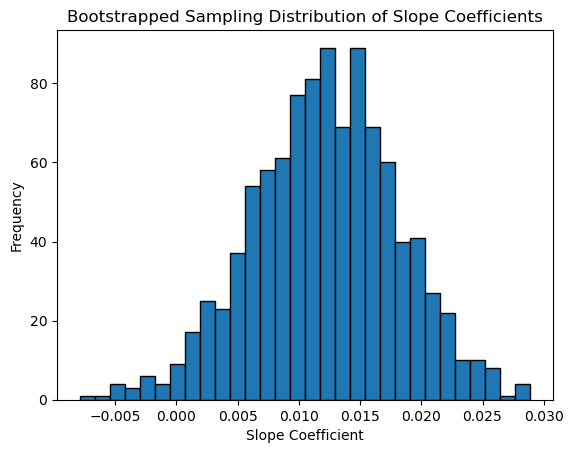

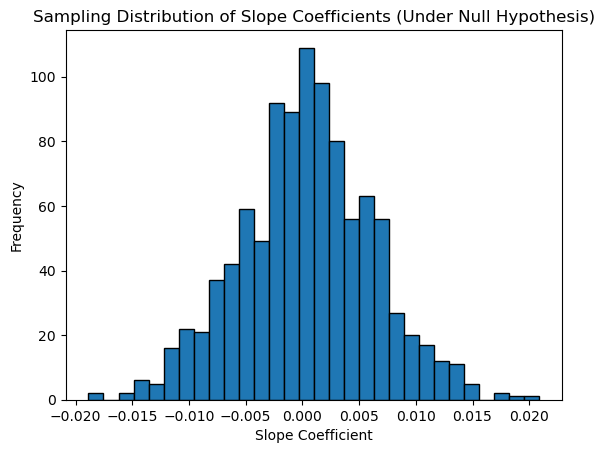

95% Bootstrapped Confidence Interval for Slope: [0.00035235 0.02358451]
Does the confidence interval contain 0? False
Simulated p-value: 0.039
OLS p-value:  0.000


In [9]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'old_faithful' DataFrame is loaded with 'waiting' and 'duration' columns

# Define filter for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Step 1: Bootstrap Sampling for Fitted Slope Coefficients
n_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstraps):
    # Create a bootstrapped sample with replacement
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

# Convert to numpy array for easier quantile calculation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrap sampling distribution of slope coefficients
plt.hist(bootstrapped_slope_coefficients, bins=30, edgecolor='black')
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.show()

# Step 2: Simulate Sampling under Null Hypothesis
# Creating a simulated dataset with no linear association (B1=0)
B0 = 1.65
mu = 0.37
simulated_slope_coefficients = []

for _ in range(n_bootstraps):
    # Create simulated data under null hypothesis assumption
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = B0 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=mu).rvs(size=long_wait.sum())
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params['waiting'])

# Convert to numpy array for easier quantile calculation
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the sampling distribution under null hypothesis
plt.hist(simulated_slope_coefficients, bins=30, edgecolor='black')
plt.title("Sampling Distribution of Slope Coefficients (Under Null Hypothesis)")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.show()

# Step 3: Confidence Interval and p-value Comparison
# Calculate the 95% confidence interval from bootstrapped slopes
confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Check if 0 is within this interval
contains_zero = confidence_interval[0] <= 0 <= confidence_interval[1]

# Fit the original model to get the observed slope
observed_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = observed_model.params['waiting']

# Calculate the simulated p-value
p_value_simulated = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Print results
print("95% Bootstrapped Confidence Interval for Slope:", confidence_interval)
print("Does the confidence interval contain 0?", contains_zero)
print("Simulated p-value:", p_value_simulated)
print("OLS p-value:", observed_model.summary().tables[1][1][4])  # Assuming p-value is in the 5th column of the second row

# 11. 

## Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and instead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

## Yi=Bintercept +1[“long”](K_i)B contrast +Ei where Ei ~ N(0,mu)

## where we use Ki (rather than Xi) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, 

## - explain the "big picture" differences between this model specification and the previously considered model specifications

### smf.ols('duration ~ waiting', data=old_faithful)
### smf.ols('duration ~ waiting', data=old_faithful[short_wait])
### smf.ols('duration ~ waiting', data=old_faithful[long_wait])

## and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model


Previous models used 'waiting' as a continuous variable to examine how duration changes with different waiting times, whereas the new model uses 'kind' (short vs. long) as a categorical variable, comparing average durations between two groups. The previous models also focused on estimating the linear relationship between 'waiting' and 'duration', fitting separate models on different subsets. However, in the new model the focus is on the difference in average durations between 'short' and 'long' categories. Furthermore, previous models estimated how each additional minute of waiting time affects duration, and the new model directly compares mean durations, offering a simpler, group-based interpretation. Lastly, previous models had fitted models on either the entire dataset or specific subsets, but the new model uses all data then categorizes it, potentially losing details about the continuous relationship. In summary, the new model simplifies interpretation by treating 'waiting' as a categorical distinction (short vs. long) rather than a continuous predictor, shifting focus from a detailed linear relationship to a straightforward group comparison.

The indicator variable-based model shows a significant p-value (p < 0.05) for the 'long' group coefficient, indicating strong evidence against the null hypothesis of "no difference between groups on average." The positive coefficient and a 95% confidence interval that does not include 0 confirm that the 'long' wait group has a significantly higher average duration than the 'short' wait group.

# chat log
#### https://chatgpt.com/share/672d8011-04cc-8003-97a3-4addc8014508

In this chat, we explored creating and interpreting a Simple Linear Regression model using an indicator variable for "short" (waiting < 68) and "long" (waiting ≥ 68) wait times in the Old Faithful dataset. The new model compared average durations between these two categories. Key findings included:

Significant evidence against the null hypothesis of "no difference on average" between groups, indicated by a low p-value for the 'long' group coefficient.

The positive coefficient and a confidence interval excluding 0 showed that the 'long' group has a higher average eruption duration than the 'short' group.

The approach contrasts with previous models that used continuous wait times as predictors, simplifying interpretation to a straightforward group comparison.

# 12. 

## Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

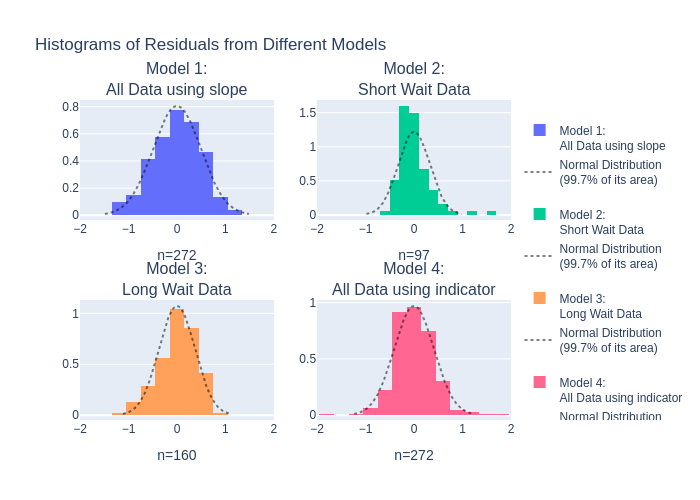

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png')

# 13.

## The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

# Chat log

#### https://chatgpt.com/share/672d9947-633c-8003-bad7-75e653c7ffea

In this chat, you requested various statistical analyses and comparisons:

Permutation Test for Mean Differences: You wanted to assess if there was a statistically significant difference in mean durations between "short" and "long" wait times. I ran a permutation test, which yielded a high p-value (~0.411), suggesting no significant difference.

Bootstrap Confidence Interval: To estimate the difference in means, I created a 95% bootstrap confidence interval, which spanned from approximately −0.137 to 0.330, indicating that zero lies within the interval, further suggesting no significant difference.

Comparison of Sampling Approaches: I explained how both the permutation test and bootstrap confidence interval methods work, highlighting their resampling techniques, minimal distributional assumptions, and goals: testing significance (permutation) versus estimating the range of the mean difference (bootstrap).

Comparison with Indicator Variable Model: You asked for a comparison with the indicator variable model from a prior question. I contrasted the non-parametric, distribution-free nature of the permutation and bootstrap methods with the parametric indicator model approach, noting that the latter relies on regression assumptions but provides both a mean difference estimate and significance test.

Each method offers unique insights and is suitable depending on assumptions and analysis goals.